In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [29]:
ztbl = Table.read('zcat.deep2.dr4.fits.gz', format='fits')
zcat = ztbl.to_pandas() # convert to pandas dataframe
zcatOG = zcat
zcat.head()

,OBJNO,RA,DEC,MAGB,MAGR,MAGI,MAGBERR,MAGRERR,MAGIERR,RG,...,ZBEST,ZERR,ZQUALITY,CLASS,SUBCLASS,RCHI2,DOF,VDISP,VDISPERR,COMMENT
0,11001673,213.868704,51.956445,23.487745,23.143082,22.582092,0.026491,0.022043,0.029253,1.369818,...,-1.000000,999.900024,2,b'NONE ',b'NONE ',0.630934,57,999.900024,999.900024,b'bcol; bext ...
1,11001699,213.810471,51.942316,22.067692,20.034674,19.545080,0.009000,0.001478,0.002079,1.957290,...,0.290608,0.000043,4,b'GALAXY',b'NONE ',1.178153,5901,166.334991,49.481255,b' ...
2,11001770,213.848431,51.948876,24.144438,24.103180,24.020006,0.068268,0.076603,0.152493,2.184211,...,-1.000000,-5.000000,1,b'GALAXY',b'NONE ',1.047260,5318,184.860001,195.000000,b' ...
3,11001800,213.831758,51.952548,25.336836,23.508480,23.081087,0.169422,0.033245,0.049654,1.795907,...,-1.000000,-5.000000,1,b'GALAXY',b'NONE ',1.014062,5788,0.000000,0.000000,b' ...
4,11001860,213.832550,51.954174,24.382738,23.401484,22.572845,0.079261,0.033940,0.035031,2.023320,...,0.957669,0.000099,4,b'GALAXY',b'NONE ',1.039979,5952,109.394997,17.208755,b' ...


In [30]:
print(len(zcat['OBJNO']))

52989


In [31]:
print(zcat.head(0))

Empty DataFrame
Columns: [OBJNO, RA, DEC, MAGB, MAGR, MAGI, MAGBERR, MAGRERR, MAGIERR, RG, E2, PA, PGAL, SFD_EBV, M_B, UB, OBJNAME, MASK, SLIT, DATE, MJD, SLITRA, SLITDEC, SLITPA, SLITLEN, Z, ZBEST, ZERR, ZQUALITY, CLASS, SUBCLASS, RCHI2, DOF, VDISP, VDISPERR, COMMENT]
Index: []

[0 rows x 36 columns]


In [32]:
zcat = zcat[zcat['ZQUALITY'] >= 3] # remove stars/sources with low accuracy or no redshift calculations
zcat = zcat[zcat['ZBEST'] != -1] # remove stars, redundant if ZQUALITY >= 3
zcat = zcat[zcat['ZERR'] >= 0] # ZERR < 0 indicates problematic fit

In [33]:
zcat_comms = zcat['COMMENT'].str.decode('UTF-8') # bytes to strings
zcat = zcat.assign(COMSTR=zcat_comms.values) # add decoded comments as new column
zcat_ser = zcat[zcat['COMSTR'].str.contains('ser')] # select rows with comments that refer to serendips
zcat_not_ser = zcat[zcat['COMSTR'].str.contains('ser') == False] # untested; should select only non-serendip rows

In [34]:
zcat_offser = zcat_ser[zcat_ser['COMSTR'].str.contains('offser')] # specify offset serendips
zcat_supser = zcat_ser[zcat_ser['COMSTR'].str.contains('supser')] # specify superimposed serendips

In [106]:
print(len(zcat))
# print(len(zcat_supser))
# print(len(zcat_offser))
# print(len(zcat_not_ser)) #test to make sure serendip numbers match up with zcat_not_ser 

36708


In [36]:
# %matplotlib inline
# plt.figure(1) #redshift histogram
# plt.hist(zcat_not_ser['Z'], bins=200,range=(0,.1), label='non-serendips')
# plt.hist(zcat_offser['Z'], bins=200, range=(0,.1), label='offser')
# plt.hist(zcat_supser['Z'], bins=200, range=(0,.1), color='black', label='supser')
# plt.xlabel('Redshift')
# plt.ylabel('# of galaxies')
# plt.legend(prop={'size': 10})
# plt.title('Redshift Histogram')
# i=0
# for z in zcat_not_ser['Z']:
#     if z<0.1:
#         i+=1
# print(i)


# i=0
# for z in zcat_offser['Z']:
#     if z<0.1:
#         i+=1
# print(i)

# i=0
# for z in zcat_supser['Z']:
#     if z<0.1:
#         i+=1
# print(i)

In [37]:
# %matplotlib inline

# plt.figure(figsize=(10,10))
# plt.plot(zcat_not_ser['Z'], zcat_not_ser['MAGB'], 'bo', ms=2)
# plt.plot(zcat_offser['Z'], zcat_offser['MAGB'], 'y>', label='>=offser-B', ms=2.5)
# plt.plot(zcat_supser['Z'], zcat_supser['MAGB'], '>', color='orange', label='>=supser-B', ms=2.5)

# # plt.plot(zcat_not_ser['Z'], zcat_not_ser['MAGR'], 'ro', ms=2)
# # plt.plot(zcat_offser['Z'], zcat_offser['MAGR'], 'y<', label='<=offser-R', ms=2.5)
# # plt.plot(zcat_supser['Z'], zcat_supser['MAGR'], '<', color='orange', label='<=supser-R', ms=2.5)

# # plt.plot(zcat_not_ser['Z'], zcat_not_ser['MAGI'], 'co', ms=2)
# # plt.plot(zcat_offser['Z'], zcat_offser['MAGI'], 'y^', label='^=offser-R', ms=2.5)
# # plt.plot(zcat_supser['Z'], zcat_supser['MAGI'], '^', color='orange', label='^=supser-R', ms=2.5)

# y = (0,26)
# x=(0.009, .009)
# plt.plot(x,y, color='r')

# plt.xlim(0,0.1)
# plt.ylim(26,18)

# plt.xlabel('Redshift')
# plt.ylabel('Apparent Magnitude')
# plt.legend(prop={'size': 10})
# plt.title('Redshift vs Apparent Magnitude (B, R, and I Magnitude)')


In [38]:
# %matplotlib inline
# plt.figure(2)
# plt.plot(zcat_not_ser['Z'], zcat_not_ser['MAGB'], 'bo', ms=2)
# plt.plot(zcat_offser['Z'], zcat_offser['MAGB'], 'y>', label='>=offser-B', ms=2.5)
# plt.plot(zcat_supser['Z'], zcat_supser['MAGB'], '>', color='orange', label='>=supser-B', ms=2.5)

# plt.plot(zcat_not_ser['Z'], zcat_not_ser['MAGR'], 'ro', ms=2)
# plt.plot(zcat_offser['Z'], zcat_offser['MAGR'], 'y<', label='<=offser-R', ms=2.5)
# plt.plot(zcat_supser['Z'], zcat_supser['MAGR'], '<', color='orange', label='<=supser-R', ms=2.5)

# plt.plot(zcat_not_ser['Z'], zcat_not_ser['MAGI'], 'co', ms=2)
# plt.plot(zcat_offser['Z'], zcat_offser['MAGI'], 'y^', label='^=offser-I', ms=2.5)
# plt.plot(zcat_supser['Z'], zcat_supser['MAGI'], '^', color='orange', label='^=supser-I', ms=2.5)

# plt.xlabel('Redshift')
# plt.ylabel('Apparent Magnitude')
# plt.legend(prop={'size': 10})
# plt.title('Redshift vs Apparent Magnitude (B, R, and I Magnitude)')

In [39]:
# %matplotlib inline
# plt.figure(3) #rest frame U–B color vs. rest frame absolute B magnitude
# plt.plot(zcat_not_ser['M_B'], zcat_not_ser['UB'], 'bo')
# # plt.plot(zcat_offser['Z'], zcat_offser['MAGB'], 'y>', label='>=offser-B')
# # plt.plot(zcat_supser['Z'], zcat_supser['MAGB'], '>', color='orange', label='>=supser-B')
# plt.xlabel('Absolute MAGB')
# plt.ylabel('Rest frame U-B')
# plt.legend(prop={'size': 10})
# plt.title('Rest Frame U–B vs. Rest Frame Asolute MAGB')

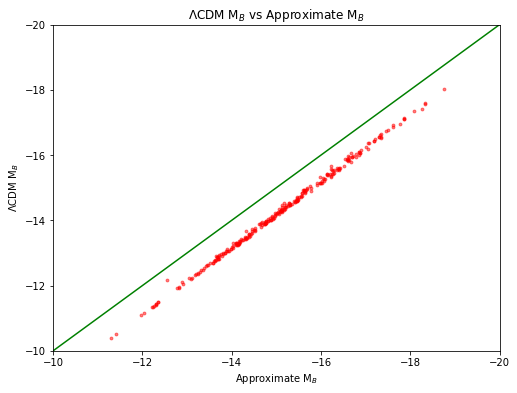

In [40]:
#This graph shows the innaccuracy of using the equation in line 7-9.

MB = zcat_not_ser['MAGB'] - 5*np.log10(zcat_not_ser['Z']*299792*10**6/65) + 5 #good for low z
MB_offser = zcat_offser['MAGB'] - 5*np.log10(zcat_offser['Z']*299792*10**6/65) + 5
MB_supser = zcat_supser['MAGB'] - 5*np.log10(zcat_supser['Z']*299792*10**6/65) + 5

MB_true = zcat_not_ser['M_B'] #- 5*np.log10(zcat_not_ser['Z']*299792*10**6/65) + 5 
MB_offser_true = zcat_offser['M_B']# - 5*np.log10(zcat_offser['Z']*299792*10**6/65) + 5
MB_supser_true = zcat_supser['M_B'] # - 5*np.log10(zcat_supser['Z']*299792*10**6/65) + 5

zcut = zcat['Z']<.1



plt.figure(figsize=(8,6))
# plt.plot( BR, MB , 'bo', ms=2, label='Non serendip')
# plt.plot( BR_offser, MB_offser, 'y>', label='offser serendip', ms=2.5)
# plt.plot(BR_supser, MB_supser, '>', color='orange', label='supser serendip', ms=2.5)
plt.scatter(MB[zcut], MB_true[zcut], color='red', s=8, alpha=0.5)
plt.plot([-10,-30],[-10,-30], color='g')
plt.ylabel('$\Lambda$CDM M$_B$')
plt.xlabel('Approximate M$_B$')
# plt.legend(loc='upper right')
plt.title('$\Lambda$CDM M$_B$ vs Approximate M$_B$')
plt.xlim(-10, -20)
plt.ylim(-10, -20)
plt.savefig('LCDM MB vs Approx MB')

In [41]:
# #Assumes LCDM (Lambda Cold Dark Matter) model with h=1 (pg. 47 of DEEP2 paper)

# plt.figure(figsize=(8,6))
# plt.plot(BR, zcat_not_ser['M_B'], 'bo', ms=2, label='Non serendip')
# plt.plot( BR_offser, zcat_offser['M_B'], 'y>', label='>=offser', ms=2.5)
# plt.plot( BR_supser, zcat_supser['M_B'], '>', color='orange', label='>=supser', ms=2.5)
# plt.xlabel('B-R')
# plt.ylabel('M_B')
# plt.legend(prop={'size': 10})
# plt.title('B-R Color vs Absolute Magnitude')
# plt.xlim(-5,10)
# plt.ylim(-10, -30)

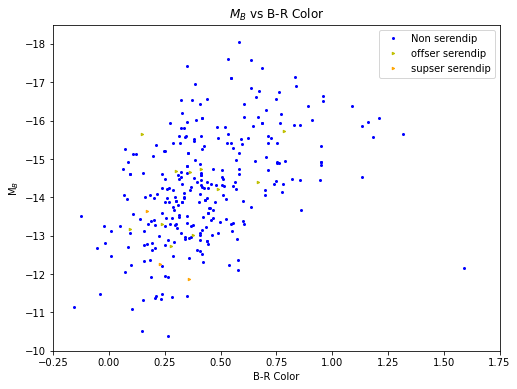

In [42]:
#REDSHIFT CUTS

z_cut = zcat['Z']<.1

BR = zcat_not_ser['MAGB'] - zcat_not_ser['MAGR']
BR_offser = zcat_offser['MAGB'] - zcat_offser['MAGR']
BR_supser = zcat_supser['MAGB'] - zcat_supser['MAGR']

BR = BR[z_cut]
BR_offser = BR_offser[z_cut]
BR_supser = BR_supser[z_cut]

MB = MB_true[z_cut]
MB_offser = MB_offser_true[z_cut]
MB_supser = MB_supser_true[z_cut]



plt.figure(figsize=(8,6))
plt.plot(BR, MB,  'bo', ms=2, label='Non serendip')
plt.plot(BR_offser, MB_offser, 'y>', label='offser serendip', ms=2.5)
plt.plot(BR_supser,MB_supser, '>', color='orange', label='supser serendip', ms=2.5)
plt.xlabel('B-R Color')
plt.ylabel('M${_B}$')
plt.legend(loc='upper right')
plt.title('${M_B}$ vs B-R Color')
plt.xlim(-.25,1.75)
plt.ylim(-10.0, -18.5)
plt.savefig('FULL_MB_VS_BR_COLOR')

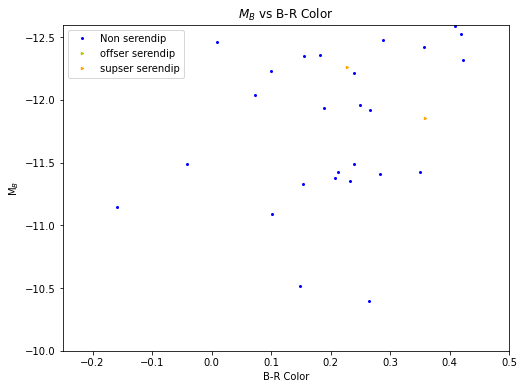

In [43]:
# nonoffser_cut = list(MB>-12.1)
# offser_cut = list(MB_offser>-12.1)
# supser_cut = list(MB_supser>-12.1)

# BR = BR[nonoffser_cut]
# BR
# BR_offser = BR_offser[offser_cut]
# BR_supser = BR_supser[supser_cut]

# MB = MB[nonoffser_cut]
# print(MB)
# MB_offser = MB_offser[offser_cut]
# MB_supser = MB_supser[supser_cut]


plt.figure(figsize=(8,6))
plt.plot(BR, MB,  'bo', ms=2, label='Non serendip')
plt.plot(BR_offser, MB_offser, 'y>', label='offser serendip', ms=2.5)
plt.plot(BR_supser,MB_supser, '>', color='orange', label='supser serendip', ms=2.5)
plt.xlabel('B-R Color')
plt.ylabel('M${_B}$')
plt.legend(loc='upper left')
plt.title('${M_B}$ vs B-R Color')
plt.xlim(-.25,.5)
plt.ylim(-10, -12.6)
plt.savefig('ZOOMED_IN_MB_VS_BR_COLOR')

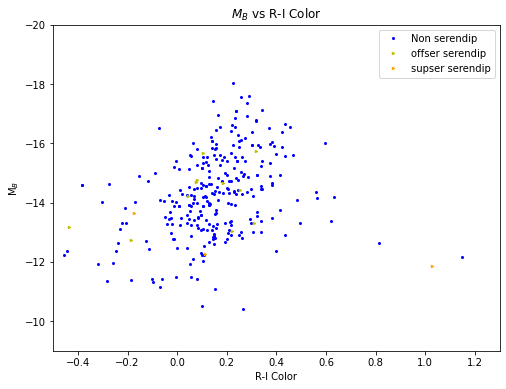

In [44]:
RI = zcat_not_ser['MAGR'] - zcat_not_ser['MAGI']
RI_offser = zcat_offser['MAGR'] - zcat_offser['MAGI']
RI_supser = zcat_supser['MAGR'] - zcat_supser['MAGI']

RI = RI[z_cut]
RI_offser = RI_offser[z_cut]
RI_supser = RI_supser[z_cut]


plt.figure(figsize=(8,6))
plt.plot(RI, MB,  'bo', ms=2, label='Non serendip')
plt.plot(RI_offser, MB_offser, 'y>', label='offser serendip', ms=2.5)
plt.plot(RI_supser,MB_supser, '>', color='orange', label='supser serendip', ms=2.5)
plt.xlabel('R-I Color')
plt.ylabel('M${_B}$')
plt.legend(loc='upper right')
plt.title('${M_B}$ vs R-I Color')
plt.xlim(-.5,1.3)
plt.ylim(-9, -20)
plt.savefig('FULL_MB_VS_RI_COLOR')

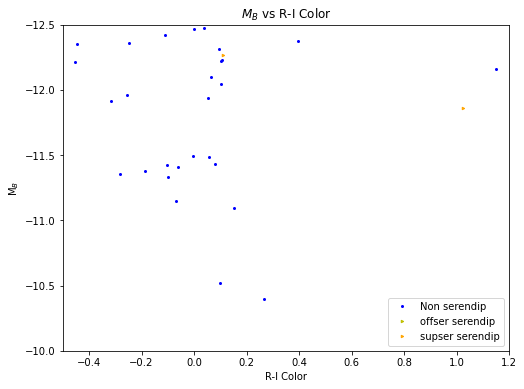

In [45]:
RI = zcat_not_ser['MAGR'] - zcat_not_ser['MAGI']
RI_offser = zcat_offser['MAGR'] - zcat_offser['MAGI']
RI_supser = zcat_supser['MAGR'] - zcat_supser['MAGI']

RI = RI[z_cut]
RI_offser = RI_offser[z_cut]
RI_supser = RI_supser[z_cut]



plt.figure(figsize=(8,6))
plt.plot(RI, MB,  'bo', ms=2, label='Non serendip')
plt.plot(RI_offser, MB_offser, 'y>', label='offser serendip', ms=2.5)
plt.plot(RI_supser,MB_supser, '>', color='orange', label='supser serendip', ms=2.5)
plt.xlabel('R-I Color')
plt.ylabel('M${_B}$')
plt.legend(loc='lower right')
plt.title('${M_B}$ vs R-I Color')
plt.xlim(-.5,1.2)
plt.ylim(-10, -12.5)
plt.savefig('ZOOMED_IN_MB_VS_RI_COLOR')

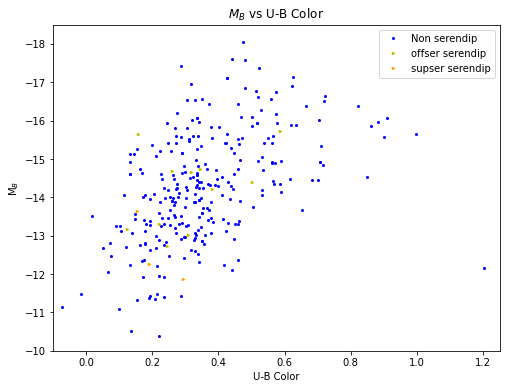

In [46]:
UB = zcat_not_ser['UB']
UB_offser = zcat_offser['UB']# - zcat_offser['MAGI']
UB_supser = zcat_supser['UB']# - zcat_supser['MAGI']

UB = UB[z_cut]
UB_offser = UB_offser[z_cut]
UB_supser = UB_supser[z_cut]


plt.figure(figsize=(8,6))
plt.plot(UB, MB,  'bo', ms=2, label='Non serendip')
plt.plot(UB_offser, MB_offser, 'y>', label='offser serendip', ms=2.5)
plt.plot(UB_supser,MB_supser, '>', color='orange', label='supser serendip', ms=2.5)
plt.xlabel('U-B Color')
plt.ylabel('M${_B}$')
plt.legend(loc='upper right')
plt.title('${M_B}$ vs U-B Color')
plt.xlim(-.1,1.25)
plt.ylim(-10, -18.5)
plt.savefig('FULL_MB_VS_UB_COLOR')

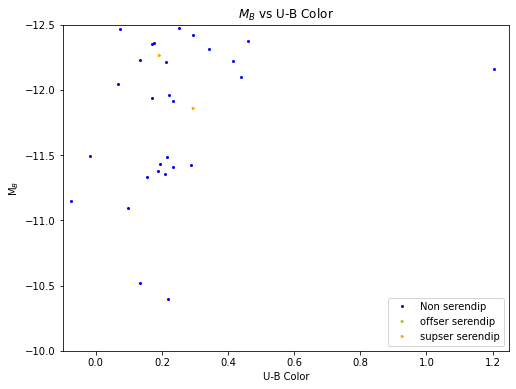

In [47]:
plt.figure(figsize=(8,6))
plt.plot(UB, MB,  'bo', ms=2, label='Non serendip')
plt.plot(UB_offser, MB_offser, 'y>', label='offser serendip', ms=2.5)
plt.plot(UB_supser,MB_supser, '>', color='orange', label='supser serendip', ms=2.5)
plt.xlabel('U-B Color')
plt.ylabel('M${_B}$')
plt.legend(loc='lower right')
plt.title('${M_B}$ vs U-B Color')
plt.xlim(-.1,1.25)
plt.ylim(-10, -12.5)
plt.savefig('ZOOMED_IN_MB_VS_UB_COLOR')

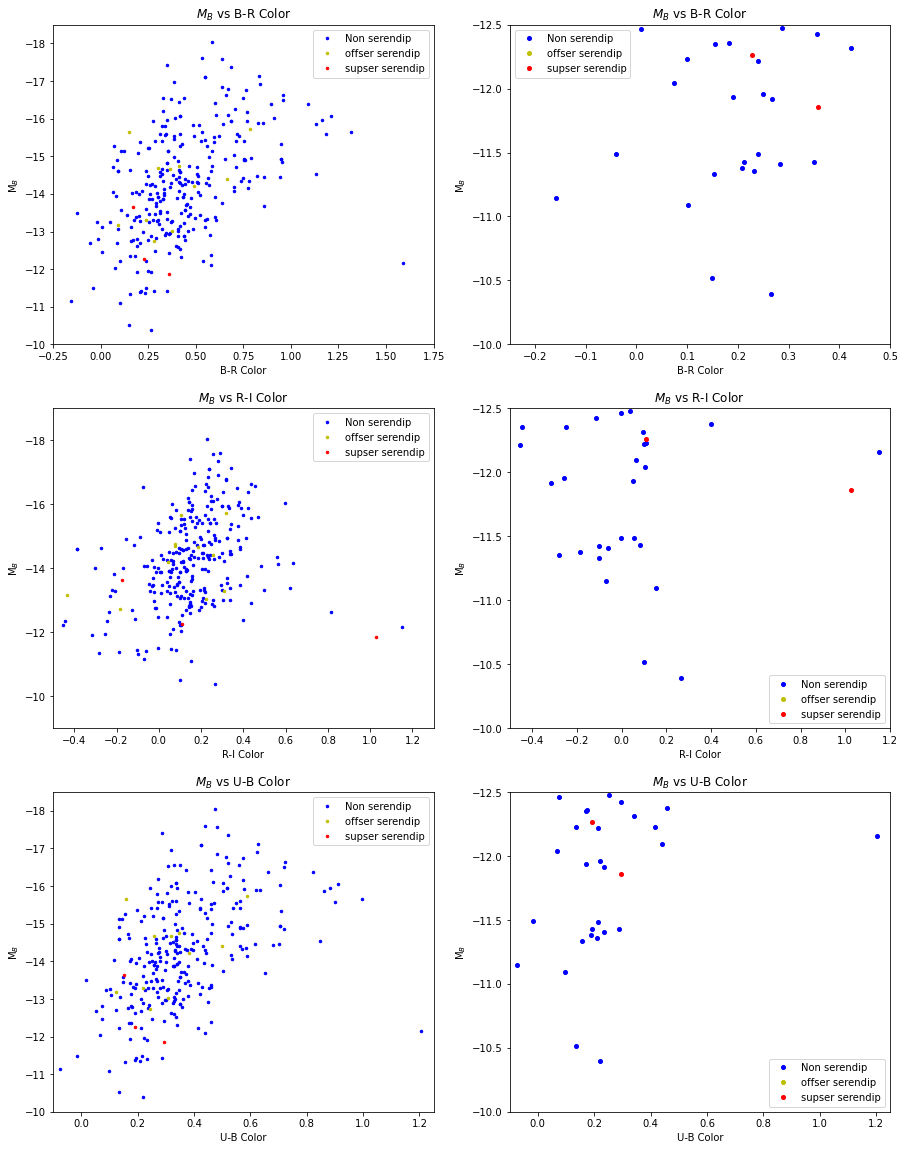

In [48]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
axs[0,0].plot(BR, MB,  'bo', ms=2.5, label='Non serendip')
axs[0, 0].plot(BR_offser, MB_offser, 'yo', label='offser serendip', ms=2.5)
axs[0, 0].plot(BR_supser,MB_supser, 'ro', color='red', label='supser serendip', ms=2.5)
axs[0, 0].set(xlabel='B-R Color', ylabel='M${_B}$', title='${M_B}$ vs B-R Color', xlim=(-.25,1.75), ylim=(-10.0, -18.5))
axs[0,0].legend(loc='upper right')

axs[0, 1].plot(BR, MB,  'bo', ms=4, label='Non serendip')
axs[0, 1].plot(BR_offser, MB_offser, 'yo', label='offser serendip', ms=4)
axs[0, 1].plot(BR_supser,MB_supser, 'ro', label='supser serendip', ms=4)
axs[0, 1].set(xlabel='B-R Color', ylabel='M${_B}$', title='${M_B}$ vs B-R Color', xlim=(-.25,.5), ylim=(-10, -12.5))
axs[0,1].legend(loc='upper left')

axs[1,0].plot(RI, MB,  'bo', ms=2.5, label='Non serendip')
axs[1,0].plot(RI_offser, MB_offser, 'yo', label='offser serendip', ms=2.5)
axs[1,0].plot(RI_supser,MB_supser, 'ro', label='supser serendip', ms=2.5)
axs[1,0].set(xlabel='R-I Color', ylabel='M${_B}$', title='${M_B}$ vs R-I Color', xlim=(-.5,1.3), ylim=(-9, -19))
axs[1,0].legend(loc='upper right')

axs[1, 1].plot(RI, MB,  'bo', ms=4, label='Non serendip')
axs[1, 1].plot(RI_offser, MB_offser, 'yo', label='offser serendip', ms=4)
axs[1, 1].plot(RI_supser,MB_supser, 'ro', label='supser serendip', ms=4)
axs[1, 1].set(xlabel='R-I Color', ylabel='M${_B}$', title='${M_B}$ vs R-I Color', xlim=(-.5,1.2), ylim=(-10, -12.5))
axs[1, 1].legend(loc='lower right')

axs[2,0].plot(UB, MB,  'bo', ms=2.5, label='Non serendip')
axs[2,0].plot(UB_offser, MB_offser, 'yo', label='offser serendip', ms=2.5)
axs[2,0].plot(UB_supser,MB_supser, 'ro', label='supser serendip', ms=2.5)
axs[2,0].set(xlabel='U-B Color', ylabel='M${_B}$', title='${M_B}$ vs U-B Color', xlim=(-.1,1.25), ylim=(-10, -18.5))
axs[2,0].legend(loc='upper right')

axs[2, 1].plot(UB, MB,  'bo', ms=4, label='Non serendip')
axs[2, 1].plot(UB_offser, MB_offser, 'yo', label='offser serendip', ms=4)
axs[2, 1].plot(UB_supser,MB_supser, 'ro', label='supser serendip', ms=4)
axs[2, 1].set(xlabel='U-B Color', ylabel='M${_B}$', title='${M_B}$ vs U-B Color', xlim=(-.1,1.25), ylim=(-10, -12.5))
axs[2, 1].legend(loc='lower right')

plt.savefig("Low_Z_Low_L_DEEP2_Color_Diagrams")


# plt.plot(BR, MB,  'bo', ms=2, label='Non serendip')
# plt.plot(BR_offser, MB_offser, 'y>', label='offser serendip', ms=2.5)
# plt.plot(BR_supser,MB_supser, '>', color='orange', label='supser serendip', ms=2.5)
# plt.xlabel('B-R Color')
# plt.ylabel('M${_B}$')
# plt.legend(loc='upper right')
# plt.title('${M_B}$ vs B-R Color')
# plt.xlim(-.25,1.75)
# plt.ylim(-10.0, -18.5)
# plt.savefig('FULL_MB_VS_BR_COLOR')

# plt.plot(BR, MB,  'bo', ms=2, label='Non serendip')
# plt.plot(BR_offser, MB_offser, 'y>', label='offser serendip', ms=2.5)
# plt.plot(BR_supser,MB_supser, '>', color='orange', label='supser serendip', ms=2.5)
# plt.xlabel('B-R Color')
# plt.ylabel('M${_B}$')
# plt.legend(loc='upper left')
# plt.title('${M_B}$ vs B-R Color')
# plt.xlim(-.25,.5)
# plt.ylim(-10, -12.6)
# plt.savefig('ZOOMED_IN_MB_VS_BR_COLOR')

# plt.plot(RI, MB,  'bo', ms=2, label='Non serendip')
# plt.plot(RI_offser, MB_offser, 'y>', label='offser serendip', ms=2.5)
# plt.plot(RI_supser,MB_supser, '>', color='orange', label='supser serendip', ms=2.5)
# plt.xlabel('R-I Color')
# plt.ylabel('M${_B}$')
# plt.legend(loc='upper right')
# plt.title('${M_B}$ vs R-I Color')
# plt.xlim(-.5,1.3)
# plt.ylim(-9, -20)
# plt.savefig('FULL_MB_VS_RI_COLOR')

# plt.plot(RI, MB,  'bo', ms=2, label='Non serendip')
# plt.plot(RI_offser, MB_offser, 'y>', label='offser serendip', ms=2.5)
# plt.plot(RI_supser,MB_supser, '>', color='orange', label='supser serendip', ms=2.5)
# plt.xlabel('R-I Color')
# plt.ylabel('M${_B}$')
# plt.legend(loc='lower right')
# plt.title('${M_B}$ vs R-I Color')
# plt.xlim(-.5,1.2)
# plt.ylim(-11, -12.5)
# plt.savefig('ZOOMED_IN_MB_VS_RI_COLOR')

# plt.plot(UB, MB,  'bo', ms=2, label='Non serendip')
# plt.plot(UB_offser, MB_offser, 'y>', label='offser serendip', ms=2.5)
# plt.plot(UB_supser,MB_supser, '>', color='orange', label='supser serendip', ms=2.5)
# plt.xlabel('U-B Color')
# plt.ylabel('M${_B}$')
# plt.legend(loc='upper right')
# plt.title('${M_B}$ vs U-B Color')
# plt.xlim(-.1,1.25)
# plt.ylim(-10, -18.5)
# plt.savefig('FULL_MB_VS_UB_COLOR')

# plt.plot(UB, MB,  'bo', ms=2, label='Non serendip')
# plt.plot(UB_offser, MB_offser, 'y>', label='offser serendip', ms=2.5)
# plt.plot(UB_supser,MB_supser, '>', color='orange', label='supser serendip', ms=2.5)
# plt.xlabel('U-B Color')
# plt.ylabel('M${_B}$')
# plt.legend(loc='lower right')
# plt.title('${M_B}$ vs U-B Color')
# plt.xlim(-.1,1.25)
# plt.ylim(-10, -12.5)
# plt.savefig('ZOOMED_IN_MB_VS_UB_COLOR')

In [49]:
import numpy as np
keep = zcat['Z']<0.1
keep2 = zcat['M_B']>-12.5
objno = zcat['OBJNO']
MB_found = MB[keep2]
MB_offser_found = MB_offser_true[keep2]
MB_supser_found = MB_supser_true[keep2]
MB_found = np.append(MB_found, MB_offser_found)
MB_found = np.append(MB_found, MB_supser_found)
found = objno.T[np.logical_and(keep, keep2)].T
print(found)#obj number of target galaxies
print(len(found)) #double check to make sure we have the right galaxies (this should be the same amount as the line below)
print(len(MB_found)) #double check to make sure we have the right galaxies (this should be the same amount as the line above)

4906     12004563
6213     12012921
6649     12016347
13317    13057577
14029    13101516
15236    14013706
15553    14017531
16456    14027232
17219    14034468
18809    21012379
20165    21027612
22044    21049283
23573    22014441
26588    22049143
29404    31019212
31561    31045557
38731    33029695
40148    33049316
40869    41005700
42871    41028661
43168    41031189
43279    41032644
43971    41041329
43973    41041341
43974    41041344
43977    41041450
49656    42040558
49812    42042150
49870    42042913
52795    43052900
Name: OBJNO, dtype: int32
30
30


In [50]:
index = [4906   ,  
6213     ,
6649     ,
13317    ,
14029    ,
15236    ,
15553    ,
16456    ,
17219    ,
18809    ,
20165    ,
22044    ,
23573    ,
26588    ,
29404    ,31561    ,38731    ,40148    ,40869    ,42871    ,43168    ,43279    ,43971    ,43973    ,43974    ,43977   ,49656    ,49812  ,49870, 52795]    

In [51]:
a = ['RA']
b = ['DEC']
[a.append(i) for i in zcatOG['RA'][index]]
[b.append(i) for i in zcatOG['DEC'][index]]

res = "\n".join("{} {}".format(x, y) for x, y in zip(a, b))
print(res)

RA DEC
214.16532163321654 52.41410933685984
214.3275882122667 52.514389494488114
214.5099917254211 52.60985138357864
215.3744488148317 53.197888741760835
215.06545570530557 53.174485031937365
215.32242348282654 53.33651258946338
215.6749767500573 53.42824272489088
215.9548661962686 53.53643825923791
215.69254873643519 53.60963275669201
251.9849395751953 34.8288688659668
251.6534881591797 34.89435958862305
252.1293487548828 35.14223861694336
252.713134765625 34.80801010131836
253.12713623046875 35.105499267578125
351.9084167480469 0.08928978443145752
351.8921203613281 0.3301355540752411
353.5252685546875 0.21913094818592072
353.5136413574219 0.3715762495994568
37.120365142822266 0.4381880462169647
36.99089813232422 0.5940824151039124
36.69137954711914 0.609992504119873
36.5443115234375 0.5744315981864929
37.08588790893555 0.6907782554626465
37.08694076538086 0.6840884685516357
37.09064865112305 0.6827173233032227
37.08100509643555 0.6904630661010742
37.31858825683594 0.6360752582550049


In [52]:
cal_obs = np.array([4358.337105666186,4359.040687701062,4916.186501782325,5461.364536031858,5460.839543154044,5790.926459365303,6678.224236802651,6965.864801380247 ])
cal_lit = np.array([4358.33,4358.33,4916.07,5460.74,5460.74,5790.66,6677.28,6965.43])
element_cal = ["Hg", "Hg","Hg","Hg","Hg","Hg","Ar","Ar"]


dev = np.subtract(cal_obs, cal_lit)
error = 100*np.sqrt((cal_obs-cal_lit)**2)/cal_lit
frame = {"Micrometer (mm)" : [4.0,4.4,4.8,5.2,5.6,6.0,6.4,6.8],
         u"Element" : element_cal,
         u"Measured Wavelength (\u212b)" : cal_obs,
         u"Literature Wavelength (\u212b)" : cal_lit,
         u"Error (\u212b)" : dev,
         u"Error (%)" : error}

df = pd.DataFrame(frame)
display(df)



,Micrometer (mm),Element,Measured Wavelength (Å),Literature Wavelength (Å),Error (Å),Error (%)
0,4.0,Hg,4358.337106,4358.33,0.007106,0.000163
1,4.4,Hg,4359.040688,4358.33,0.710688,0.016306
2,4.8,Hg,4916.186502,4916.07,0.116502,0.002370
3,5.2,Hg,5461.364536,5460.74,0.624536,0.011437
4,5.6,Hg,5460.839543,5460.74,0.099543,0.001823
5,6.0,Hg,5790.926459,5790.66,0.266459,0.004602
6,6.4,Ar,6678.224237,6677.28,0.944237,0.014141
7,6.8,Ar,6965.864801,6965.43,0.434801,0.006242


In [111]:
ID = []
RA = []
Dec = []
B   = []
R   = []
Be  = []
Re  = []
MB  = []
UB  = []
Z   = []
Ze  = [] 
Q = []


[ID.append(i) for i in zcatOG['OBJNO'][index]]
[RA.append(i) for i in zcatOG['RA'][index]]
[Dec.append(i) for i in zcatOG['MAGB'][index]]
[B.append(i) for i in zcatOG['MAGR'][index]]
[R.append(i) for i in zcatOG['DEC'][index]]
[Be.append(i) for i in zcatOG['MAGBERR'][index]]
[Re.append(i) for i in zcatOG['MAGRERR'][index]]
[MB.append(i) for i in zcatOG['M_B'][index]]
[UB.append(i) for i in zcatOG['UB'][index]]
[Z.append(i) for i in zcatOG['Z'][index]]
[Ze.append(i) for i in zcatOG['ZERR'][index]]
[Q.append(i) for i in zcatOG['ZQUALITY'][index]]

frame = {"$ID$" : ID,
         u"$R.A.$" : RA,
         u"$Dec.$" : Dec,
         u"$B$" : B,
         u"$R$" : R,
         u"$\sigma_B$" : Be,
         u"$\sigma_R$" : Re,
         u"$M_B$" : MB,
         u"$U$-$B$" : UB,
         u"$Z$" : Z,
         u"$\sigma_Z$" : Ze,
         u"$Q$" : Q}


frame1 = {"$ID$" : ID,
         u"$R.A.$" : RA,
         u"$Dec.$" : Dec,
         u"$B$" : B,
         u"$R$" : R,
         u"$\sigma_B$" : Be,
         u"$\sigma_R$" : Re}

frame2 = {"$ID$" : ID,
         u"$M_B$" : MB,
         u"$U$-$B$" : UB,
         u"$Z$" : Z,
         u"$\sigma_Z$" : Ze,
         u"$Q$" : Q}

df = pd.DataFrame(frame)
df

# df1 = pd.DataFrame(frame1)
# df1
# print(df1)
# df2 = pd.DataFrame(frame2)
# print(df2)
# # df = df.style.set_properties(**{'text-align': 'left'})
# # display(df)
# print(df1.to_latex())
# print(df2.to_latex())

,$ID$,$R.A.$,$Dec.$,$B$,$R$,$\sigma_B$,$\sigma_R$,$M_B$,$U$-$B$,$Z$,$\sigma_Z$,$Q$
0,12004563,214.165322,24.151979,24.052654,52.414109,0.051386,0.097632,-12.2289,0.1338,0.061191,0.000009,4
1,12012921,214.327588,21.331465,21.372473,52.514389,0.010323,0.022635,-11.4899,-0.0166,0.011870,0.000003,4
2,12016347,214.509992,24.553671,23.975349,52.609851,0.084412,0.102010,-12.0970,0.4403,0.066703,0.000021,4
3,13057577,215.374449,21.105570,20.878113,53.197889,0.008160,0.004648,-12.2639,0.1908,0.015410,0.000002,4
4,13101516,215.065456,25.486149,23.897285,53.174485,0.370708,0.058224,-12.1567,1.2037,0.088220,0.000037,3
5,14013706,215.322423,24.089899,23.936548,53.336513,0.059785,0.061079,-11.3321,0.1549,0.039530,0.000004,3
6,14017531,215.674977,21.787500,21.522497,53.428243,0.010213,0.009321,-10.3940,0.2198,0.008932,0.000012,3
7,14027232,215.954866,24.167673,23.630236,53.536438,0.055836,0.038808,-12.2243,0.4153,0.059801,0.000011,4
8,14034468,215.692549,23.929371,23.662867,53.609633,0.063381,0.053223,-11.9169,0.2348,0.047678,0.000016,4
9,21012379,251.984940,23.944397,23.732155,34.828869,0.039801,0.062537,-11.4289,0.1935,0.038604,0.000010,4


In [25]:
# d = []
# [d.append('') for i in range(0,len(a)+1)]
# res = "\n".join("{} {}".format(x, y) for x, y in zip(a, d))
# print(res)

0.03910544738173485
1.0987998189193604e-05
0.08821996301412582
30


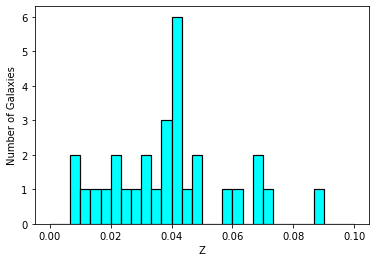

In [108]:
z_target = []
[z_target.append(i) for i in zcatOG['Z'][index]]

plt.hist(z_target, bins=30,range=(0,.1), color='cyan', edgecolor='black', linewidth=1.2)
plt.xlabel('Z')
plt.ylabel('Number of Galaxies')
# plt.title('Reds')
z_mean = np.sum(z_target)/len(z_target)
z_mean_e = np.sum(Ze)/len(Ze)
print(z_mean)
print(z_mean_e)
print(max(z_target))
print(len(z_target))
plt.savefig('Low_Z_Histogram')

In [27]:
# print(BR)
# print(zcat.T[6213])
# print(zcat.T[42871])

In [118]:
bright = [print(i) for i in range(0,len(B)) if B[i]==max(B)]
print(bright)

print(RA[11], Dec[11])



11
[None]
21049283
252.1293487548828 24.240612030029297


In [123]:
DEIMOS = ['December 02, 2019', 'December 03, 2019', 'December 31, 2019', 'January 01, 2020',
          'January 02, 2020', 'January 03, 2020', 'January 04, 2020', 'February 03, 2020', 
          'February 26, 2020', 'February 27, 2020', 'February 28, 2020', 'September 20, 2020',
          'September 21, 2020', 'September 24, 2020', 'September 25, 2020', 'October 09, 2020',
         'October 10, 2020', 'October 13, 2020', 'October 14, 2020', 'October 15, 2020', 'October 16, 2020',
         'October 18, 2020','October 19, 2020', 'November 07, 2020', 'November 08, 2020', 'November 09, 2020',
         'November 10, 2020', 'November 17, 2020']

ESI = ['February 15, 2021', 'February 16, 2021', 'March 05, 2021', 'March 06, 2021', '*April 30 , 2021', '*May 01, 2021',
      '','','','','','','','','','','','','','','','','','','','','','']

print(len(DEIMOS))
print(len(ESI))

date_frame = {"DEIMOS Dates" : DEIMOS,
         u"ESI Dates" : ESI}


dates = pd.DataFrame(date_frame)
print(dates.to_latex())

28
28
\begin{tabular}{lll}
\toprule
{} &        DEIMOS Dates &          ESI Dates \\
\midrule
0  &   December 02, 2019 &  February 15, 2021 \\
1  &   December 03, 2019 &  February 16, 2021 \\
2  &   December 31, 2019 &     March 05, 2021 \\
3  &    January 01, 2020 &     March 06, 2021 \\
4  &    January 02, 2020 &   *April 30 , 2021 \\
5  &    January 03, 2020 &      *May 01, 2021 \\
6  &    January 04, 2020 &                    \\
7  &   February 03, 2020 &                    \\
8  &   February 26, 2020 &                    \\
9  &   February 27, 2020 &                    \\
10 &   February 28, 2020 &                    \\
11 &  September 20, 2020 &                    \\
12 &  September 21, 2020 &                    \\
13 &  September 24, 2020 &                    \\
14 &  September 25, 2020 &                    \\
15 &    October 09, 2020 &                    \\
16 &    October 10, 2020 &                    \\
17 &    October 13, 2020 &                    \\
18 &    October 14, 2020